In [1]:
%run cnn_train.py --optimizer=ADAM
%run cnn_train.py --optimizer=SGD
%run cnn_train.py --optimizer=ADAGRAD
%run cnn_train.py --optimizer=ADAM --learning_rate=1e-2
%run cnn_train.py --optimizer=ADAM --learning_rate=1e-6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
file_names = os.listdir('outputs/')
print(file_names)
dfs = {}
for name in file_names:
    path = 'outputs/' + name
    if os.path.isdir(path):
        continue
    key = name.split('.c')[0]
    print(key)
    dfs[key] = pd.read_csv(path)

['ADAM_0.0001.csv', 'SGD_0.0001.csv', 'ADAM_0.01.csv', 'ADAGRAD_0.0001.csv', 'ADAM_1e-06.csv']
ADAM_0.0001
SGD_0.0001
ADAM_0.01
ADAGRAD_0.0001
ADAM_1e-06


In [3]:
def draw_eval(epochs, train_acc, test_acc, train_loss, test_loss, optimizer, lr):
    plt.figure(1, figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epochs, train_acc, 'r', label='Train Acc')
    plt.plot(epochs, test_acc, 'b', label='Test Acc')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"CIFAR10 {optimizer} training with lr {lr}")

    plt.subplot(122)
    plt.plot(epochs, train_loss, 'r', label='Train Loss')
    plt.plot(epochs, test_loss, 'b', label='Test Loss')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"CIFAR10 {optimizer} training with lr {lr}")
    plt.show()

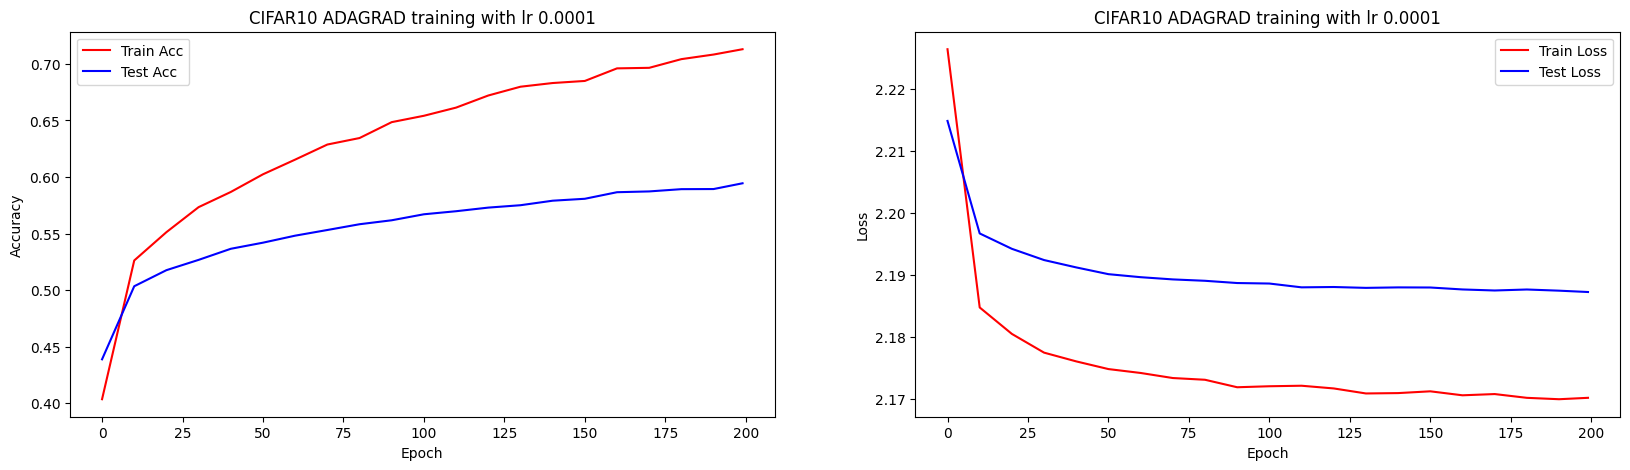

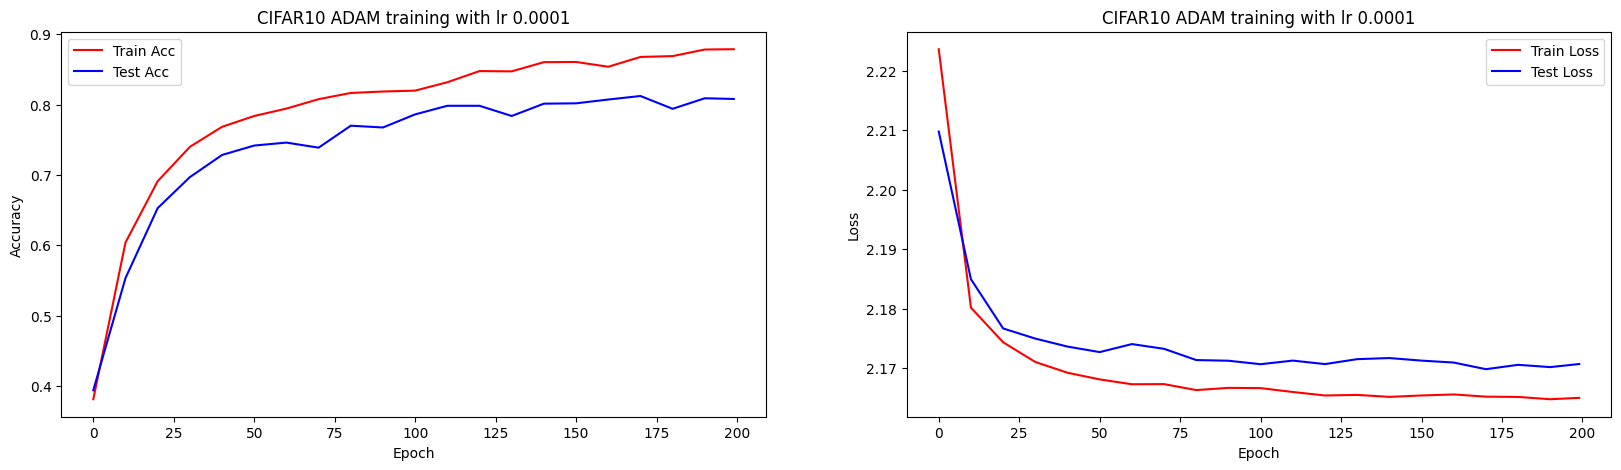

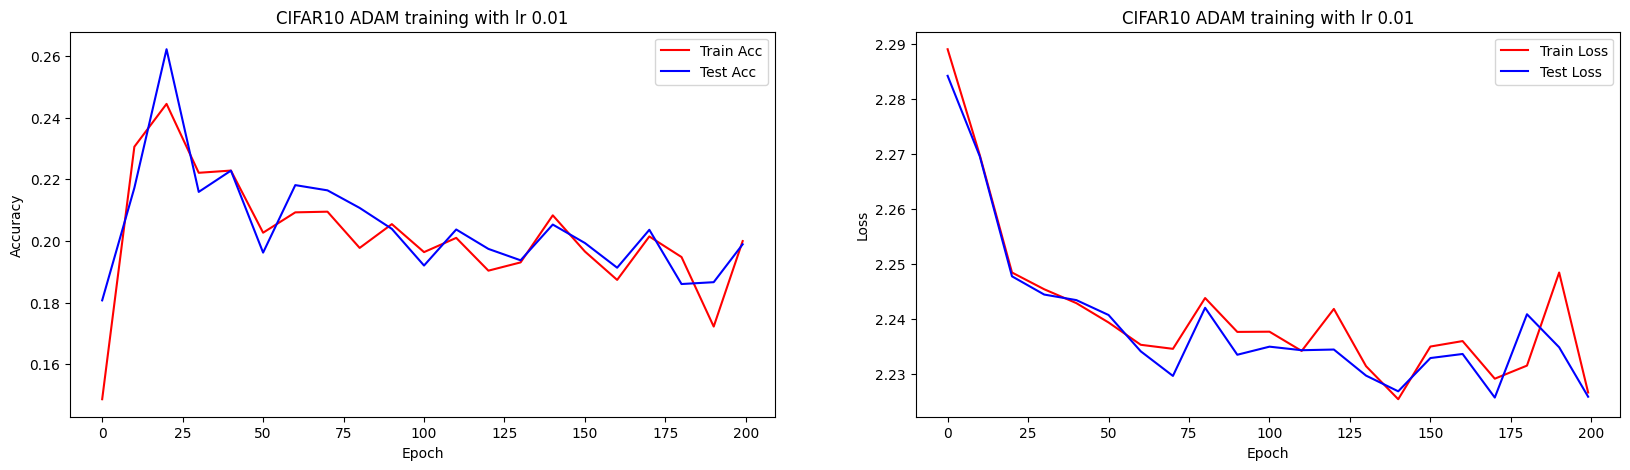

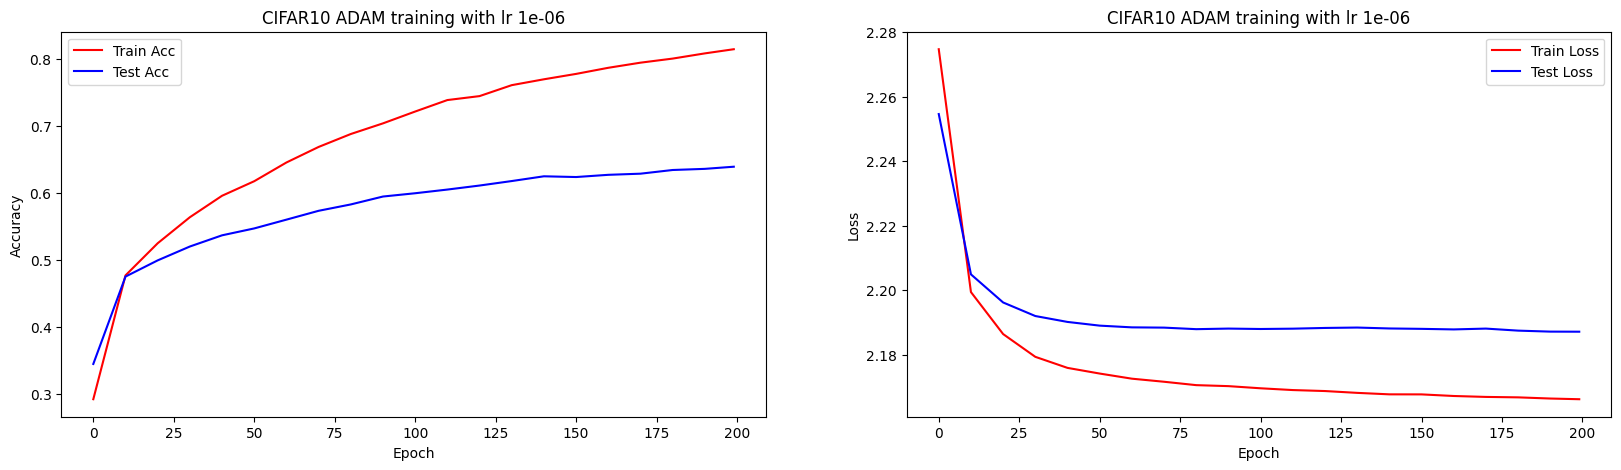

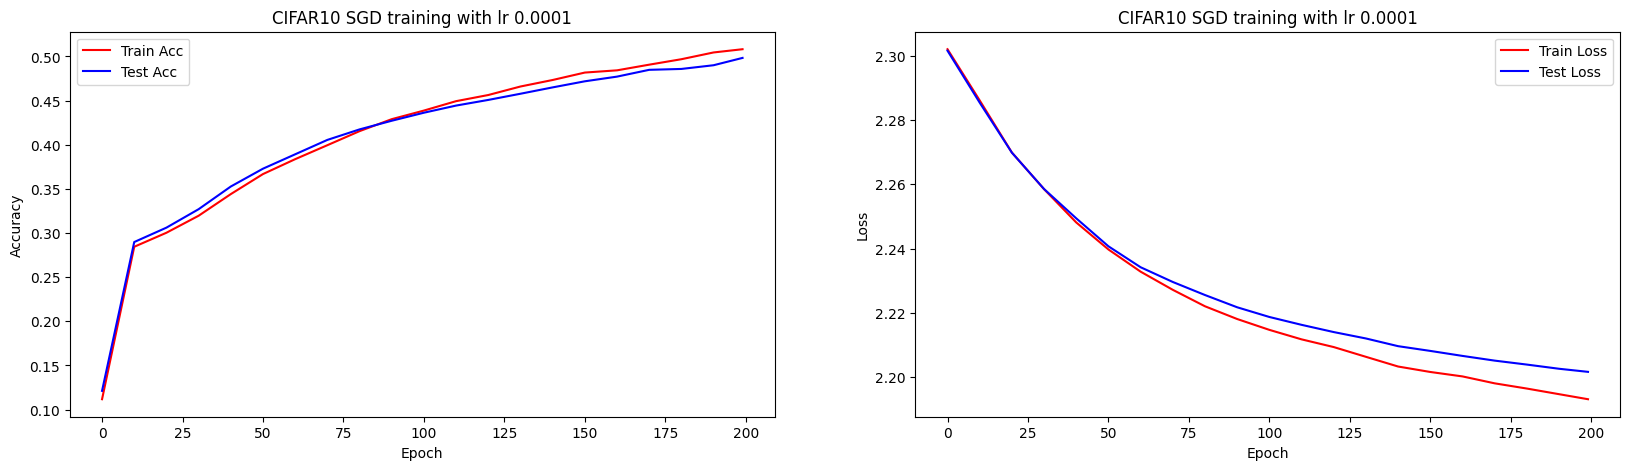

In [4]:
keys = sorted(dfs.keys())
for key in keys:
    epochs, train_acc, test_acc, train_loss, test_loss = dfs[key]['epoch'], dfs[key]['train acc'], dfs[key]['test acc'], dfs[key]['train loss'], dfs[key]['test loss']
    epochs = np.append(np.arange(0, 200, 10), 199)
    optimizer, lr = key.split('_')
    draw_eval(epochs, train_acc, test_acc, train_loss, test_loss, optimizer, lr)